In [1]:
import os

# 获取当前工作目录
current_dir = os.getcwd()
print("当前工作目录：", current_dir)
 
# 切换到上一层目录
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
print("切换后的目录：", parent_dir)

当前工作目录： /Users/lig/Documents/GitHub/NEMESIS/unit_test
切换后的目录： /Users/lig/Documents/GitHub/NEMESIS


In [2]:
import QuantLib as ql
import pandas as pd

from devlib.market.curves.cme_term_sofr_curve import CmeTermSofr1M
from devlib.products.rates.irs.general_irs import *

In [3]:
from nemesis.products.rates import *

####################################################################
#  NEMESIS ALPHA Version 0.1.0 - This build: 24 Jan 2025 at 10:42 #
####################################################################



In [4]:
today = ql.Date(9, 7, 2024)
ql.Settings.instance().evaluationDate = today

mkt_file_path = './unit_test/data/tsfr1m_curve_data_20240709.xlsx'
deposit_mkt_data = pd.read_excel(mkt_file_path, sheet_name='deposit')
base_curve_swap_mkt_data = pd.read_excel(mkt_file_path, sheet_name='base_curve_swap')

tsfr1m_curve = CmeTermSofr1M(today, deposit_mkt_data=deposit_mkt_data,
                             base_curve_swap_mkt_data=base_curve_swap_mkt_data)

In [5]:
value_dt = Date(9,7,2024)
curve = QLCurve(value_dt, tsfr1m_curve, dc_type=DayCountTypes.ACT_360, interp_type=InterpTypes.LINEAR_ZERO_RATES)

In [6]:
payment_dates = ql_date_to_date(tsfr1m_curve.curve.dates())[1:]

In [7]:
curve.print_table(payment_dt=payment_dates)

,Date,ZR,DF
0,2024-07-18,5.38925,0.998672
1,2024-07-25,5.38983,0.997640
2,2024-08-01,5.38985,0.996609
3,2024-08-12,5.38770,0.994994
4,2024-09-11,5.38803,0.990597
5,2024-10-11,5.34697,0.986324
6,2024-11-12,5.30941,0.981839
7,2024-12-11,5.27130,0.977864
8,2025-01-13,5.21752,0.973484
9,2025-02-11,5.16821,0.969741


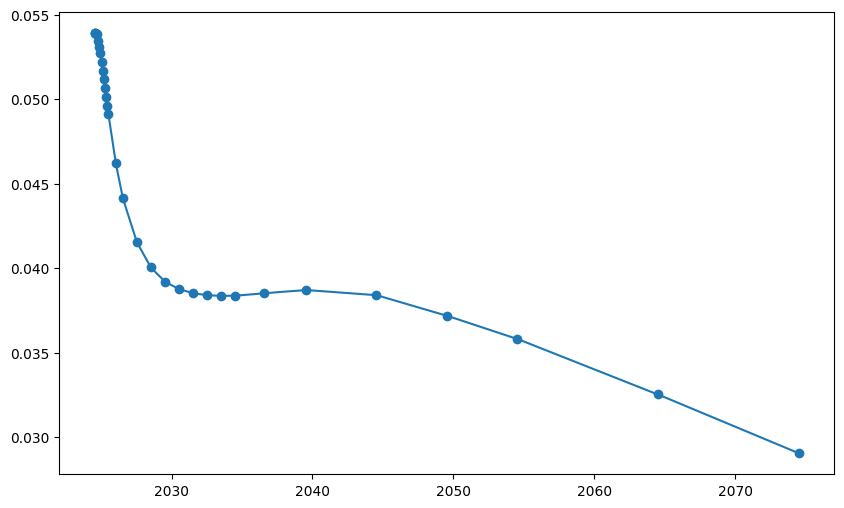

In [8]:
curve.print_figure(payment_dates)

In [9]:
fixed_type = SwapTypes.RECEIVE
fixed_freq = FrequencyTypes.MONTHLY
fixed_dc_type = DayCountTypes.ACT_360

swap = GeneralSwap(
    effective_dt=Date(26,7,2024),
    term_dt_or_tenor="10Y",
    fixed_leg_type=fixed_type,
    fixed_cpn=0.05,
    fixed_freq_type=fixed_freq,
    fixed_dc_type=fixed_dc_type,
    notional=1e7,
    payment_lag=2,
    float_multiplier=1,
    float_spread=0,
    float_compounding_type='ExcludeSprd',
    float_freq_type=FrequencyTypes.MONTHLY,
    float_dc_type=DayCountTypes.ACT_360,
    cal_type=CalendarTypes.UNITED_STATES,
    bd_type=BusDayAdjustTypes.MODIFIED_FOLLOWING,
    dg_type=DateGenRuleTypes.FORWARD,
    reset_freq='None',
    fixing_days=2,
    end_of_month= False,
    is_ois_leg=False,
)

In [10]:
swap.value(value_dt, curve, curve)

np.float64(1000436.9465075429)

In [11]:
swap.swap_rate(value_dt, curve, curve)

np.float64(-0.03801728657798699)

In [12]:
swap.dv01(value_dt, curve, curve)

np.float64(-8522.648985768203)

In [13]:
index_name = 'TSFR1M'
index_curve = tsfr1m_curve
discount_curve = tsfr1m_curve

ccy = 'USD'
sch_calendar = ql.UnitedStates(ql.UnitedStates.FederalReserve)
fixing_calendar = ql.Sofr().fixingCalendar()
payment_calendar = ql.UnitedStates(ql.UnitedStates.FederalReserve)
date_generation_rule=ql.DateGeneration.Forward
sch_convention=ql.ModifiedFollowing
end_convention=ql.ModifiedFollowing
payment_convention=ql.ModifiedFollowing
fixing_convention=ql.ModifiedPreceding
payment_delay = 2
fixing_days = 2
end_of_month = True

effective_date = ql.Date(26, 7, 2024)
maturity_date = sch_calendar.advance(effective_date, ql.Period('10Y'), sch_convention)
reset_freq = 'None'
notional = 1e7
fixed_rate = 0.05
multiplier = 1
spread = 0
fixed_leg_pay_freq = '1M'
float_leg_pay_freq = '1M'
fixed_leg_daycount = ql.Actual360()
float_leg_daycount = ql.Actual360()
fixed_leg_direction = 'receive'
float_leg_direction = 'pay'

inst = StandardFloatFixedIrs(
    ccy, index_name, effective_date, maturity_date, fixed_leg_pay_freq, 
    float_leg_pay_freq, reset_freq, notional, fixed_rate, multiplier, spread, 
    fixed_leg_daycount, float_leg_daycount, payment_delay, fixing_days, 
    sch_calendar, fixing_calendar, payment_calendar, fixed_leg_direction, float_leg_direction)

npv = inst.npv(today, index_curve, discount_curve)
par = inst.fair_rate(today, index_curve, discount_curve)
dv01_p = inst.dv01_parallel(today, index_curve, discount_curve)

print('IRS example result:')
print('npv:', npv)
print('par:', par)
print('dv01_parallel:', dv01_p)

IRS example result:
npv: 1000483.8579464569
par: 0.03801672469717013
dv01_parallel: -8522.727839482483
